# 2. Bank_Churnrate_EDA<a id='2_Data_wrangling'></a>

## 2.1 Table of Contents<a id='2.1_Contents'></a>
* 2. Bank_Churnrate_Data_Wrangling
  * 2.1 Table of Contents
  * 2.2 Introduction
  * 2.3 Imports
  * 2.4 Load Supply Chain Train Data
  * 2.5 Explore The Data
    * 2.5.1 Number Of Missing Values By Column & Assessing the Data
    * 2.5.2 Categorical Features
      * 2.5.2.1 Unique Categorical Data
      * 2.5.2.2 Assessing User Base
    * 2.5.3 Numeric Features
      * 2.5.3.1 Numeric data summary
      * 2.5.3.2 Distributions Of Feature Values
  * 2.6 Target Feature (Attrition Flag)
    * 2.11.1 Number Of Missing Values By Row - Resort
  * 2.7 Save data
  * 2.8 Summary


## 2.2 Introduction

Further Analysis will be conducted with the Bank Data Cleaned dataset to glean any further insights regarding correlation with the determined feature value of Attrition Flag along with determining any noteworthy relationships regarding churned vs. not churned people groups.

## 2.3 Imports<a id='2.3_Imports'></a>

Importing all appropriate packages in order to perform further EDA for the previously "cleaned" dataset.

In [50]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from ydata_profiling import ProfileReport

## 2.4 Load Bank Churn Cleaned Data

In [20]:
# the supplied CSV data file is the raw_data directory, dropped first column since it was unnamed and repeat of train_idx
#Code to remove the first column for the dataset: https://www.statology.org/drop-unnamed-column-pandas/
bank_clean_df = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/bank_data_train_clean.csv', index_col=0)

Auditing the dataset with .info() and .head() displaying the first few records.

In [21]:
#info method on bank_df to see a summary of the data
bank_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   train_idx                 8101 non-null   int64  
 1   CLIENTNUM                 8101 non-null   int64  
 2   Customer_Age              8101 non-null   int64  
 3   Gender                    8101 non-null   object 
 4   Dependent_count           8101 non-null   int64  
 5   Education_Level           6896 non-null   object 
 6   Marital_Status            7522 non-null   object 
 7   Income_Category           7212 non-null   object 
 8   Card_Category             8101 non-null   object 
 9   Months_on_book            8101 non-null   int64  
 10  Total_Relationship_Count  8101 non-null   int64  
 11  Months_Inactive_12_mon    8101 non-null   int64  
 12  Contacts_Count_12_mon     8101 non-null   int64  
 13  Credit_Limit              8101 non-null   float64
 14  Total_Re

In [22]:
#head method on bank_df to print the first several rows of the data
bank_clean_df.head()

,train_idx,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0,713071383,54,F,1,NaN,Single,NaN,Blue,36,...,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,1,714246333,58,F,4,High School,Married,NaN,Blue,48,...,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,2,718206783,45,F,4,NaN,Single,Less than $40K,Gold,36,...,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,...,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,...,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


## 2.5 Explore The Data

### 2.5.1 Number Of Missing Values By Column & Assessing Data

Count the number of missing values in each column and sort them.

In [23]:
#The statement below came from the ski_data project but is used here as well to calculate number and percent
#of missing values in the dataset.

missing = pd.concat([bank_clean_df.isnull().sum(), 100 * bank_clean_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
Education_Level,1205,14.874707
Income_Category,889,10.973954
Marital_Status,579,7.147266
train_idx,0,0.000000
Credit_Limit,0,0.000000
Avg_Utilization_Ratio,0,0.000000
Total_Ct_Chng_Q4_Q1,0,0.000000
Total_Trans_Ct,0,0.000000
Total_Trans_Amt,0,0.000000
Total_Amt_Chng_Q4_Q1,0,0.000000


Looking at the dataset: Education Level, Income Category, and Maritial status have null records with about 15% null in Education Level. Now will need to also verify if all columns have "right" type of data.

In [24]:
#Assessing columns as well based on .describe() method
bank_clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
train_idx,8101.0,4.050000e+03,2.338702e+03,0.0,2.025000e+03,4.050000e+03,6.075000e+03,8.100000e+03
CLIENTNUM,8101.0,7.391329e+08,3.691912e+07,708082083.0,7.130534e+08,7.178860e+08,7.728464e+08,8.283431e+08
Customer_Age,8101.0,4.630638e+01,8.022527e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.000000e+01
Dependent_count,8101.0,2.334773e+00,1.289564e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,8101.0,3.592359e+01,8.024359e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,8101.0,3.813233e+00,1.551838e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,8101.0,2.346871e+00,1.014177e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,8101.0,2.450315e+00,1.100687e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,8101.0,8.636548e+03,9.086420e+03,1438.3,2.555000e+03,4.549000e+03,1.112800e+04,3.451600e+04
Total_Revolving_Bal,8101.0,1.160383e+03,8.155043e+02,0.0,3.260000e+02,1.273000e+03,1.782000e+03,2.517000e+03


In [61]:
#Created a ydata profile report to provide further analysis breakdown of dataset.
#profile = ProfileReport(bank_df, title="Profiling Report")
#profile.to_file('Churn_Train_Dataset_Profile_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.5.2 Categorical Features

Finally displaying a correlation heatmap to describe relationships of features within the dataset according to the Attrition Flag column which describes which customers have churned or not churned from the dataset.

C:\Users\tpooz\AppData\Local\Temp\ipykernel_30592\243802318.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bank_clean_df.corr()


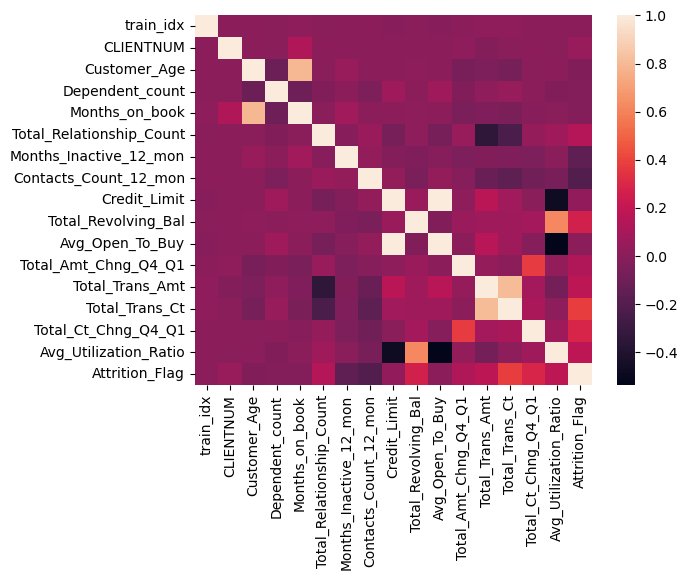

In [25]:
corr = bank_clean_df.corr()
sns.heatmap(corr)
plt.show()

In [26]:
corr['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag              1.000000
Total_Trans_Ct              0.380618
Total_Ct_Chng_Q4_Q1         0.288937
Total_Revolving_Bal         0.263335
Avg_Utilization_Ratio       0.179838
Total_Trans_Amt             0.178078
Total_Relationship_Count    0.150889
Total_Amt_Chng_Q4_Q1        0.128559
CLIENTNUM                   0.047136
Credit_Limit                0.024437
Avg_Open_To_Buy             0.000803
train_idx                   0.000638
Dependent_count            -0.020550
Months_on_book             -0.022270
Customer_Age               -0.035203
Months_Inactive_12_mon     -0.156552
Contacts_Count_12_mon      -0.211327
Name: Attrition_Flag, dtype: float64

#### 2.5.2.1 Unique Categorical Data

An interting phenomna to understand would be to see what the user base is for customers who churned vs. not churned in the dataset. As well as to get a count in the dataset for churned vs. not churned to determine imbalance in data for next steps in modeling.

In [42]:
#Retrieive data for customers who churned
bank_current = bank_clean_df[bank_clean_df['Attrition_Flag'] == 1]

In [43]:
#Retrieve data for customers who did not churn
bank_churn = bank_clean_df[bank_clean_df['Attrition_Flag'] == 0]

In [44]:
len(bank_churn)

1300

In [45]:
len(bank_current)

6801

In [53]:
print(f"Total % for customers who have churned based on this dataset: {round(100 * len(bank_churn)/len(bank_clean_df),2)}%")

Total % for customers who have churned based on this dataset: 16.05%


Looking at the dataset, seems all categorical data has different cateogories that match the associated field and does not have different spelling or misspelled record information.

Now given the two datsets for customers churned vs. not churned, we can plot histograms for these two distributions to determine the userbase for each groups regarding the categorical variable.

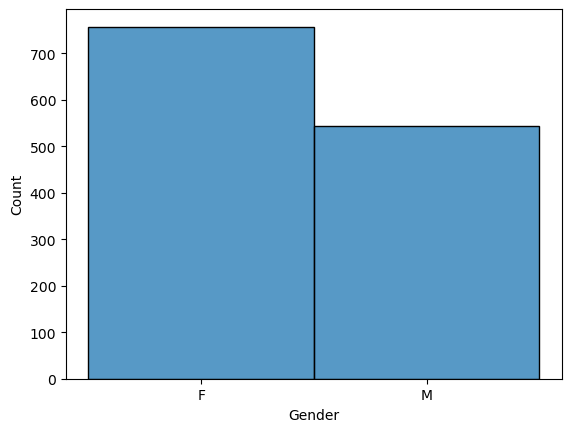

In [54]:
sns.histplot(data=bank_churn, x='Gender')
plt.show()

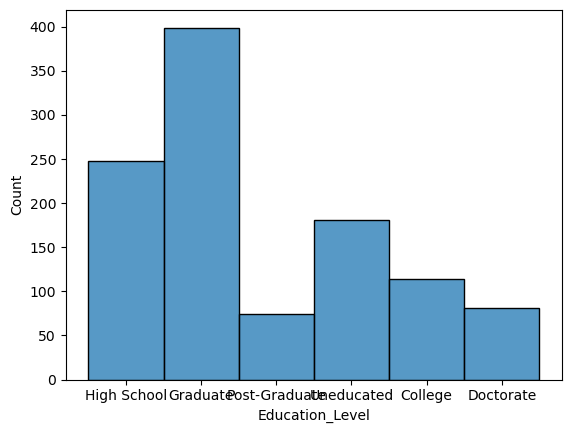

In [55]:
sns.histplot(data=bank_churn , x='Education_Level')
plt.show()

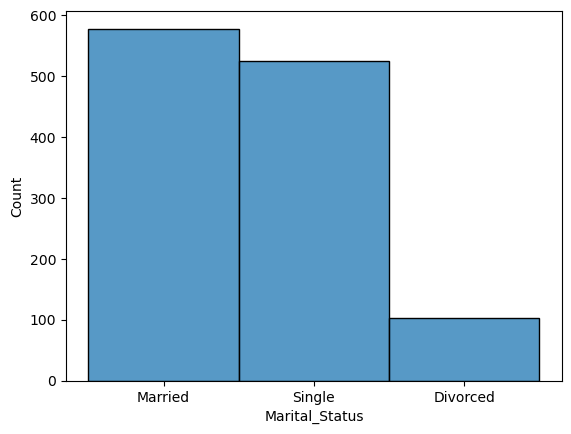

In [56]:
sns.histplot(data=bank_churn , x='Marital_Status')
plt.show()

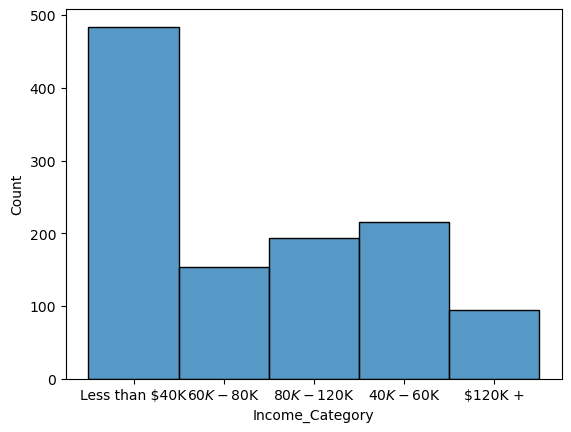

In [57]:
sns.histplot(data=bank_churn , x='Income_Category')
plt.show()

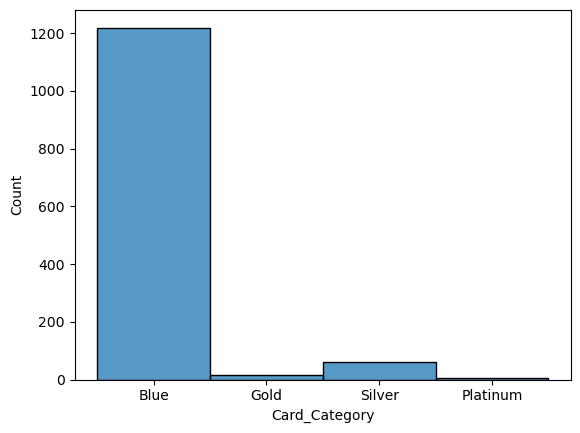

In [58]:
sns.histplot(data=bank_churn , x='Card_Category')
plt.show()

Based upon this churned dataset assessment, it seems that the more common users from the churned sample are female users, graduate users, users who are either married or single, users making less than 40k, and users who are in the more common Blue category card holders. 

#### 2.5.2.2 Assessing User Base

Now, will modify the categorical varibles with one-hot encoding in order to create numeric values to be used in future modeling as well as applying the correlation in order to see if categorical variables are in any correlation with the Attrition Flag target feature values.

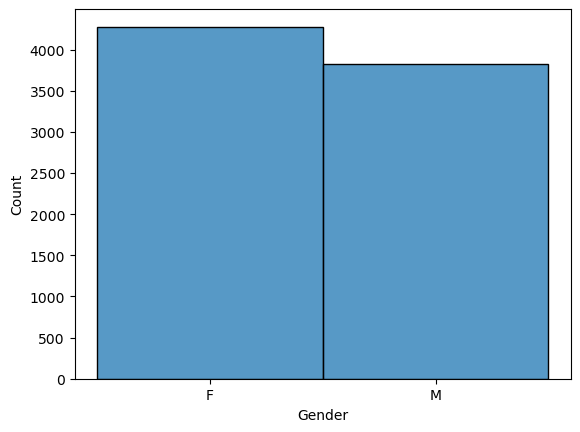

In [89]:
#Plot distribution of Gender
sns.histplot(data=bank_df, x='Gender')
plt.show()

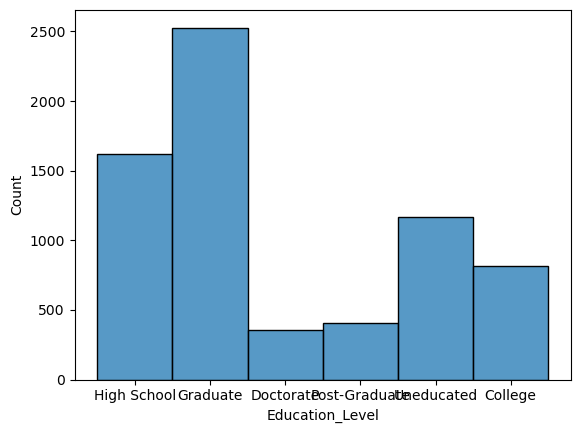

In [90]:
sns.histplot(data=bank_df , x='Education_Level')
plt.show()

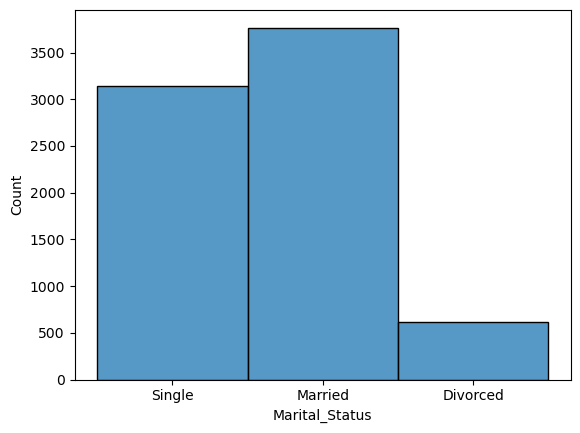

In [91]:
sns.histplot(data=bank_df , x='Marital_Status')
plt.show()

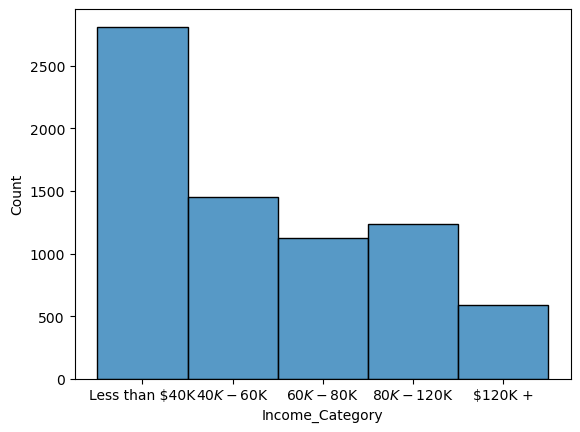

In [92]:
sns.histplot(data=bank_df , x='Income_Category')
plt.show()

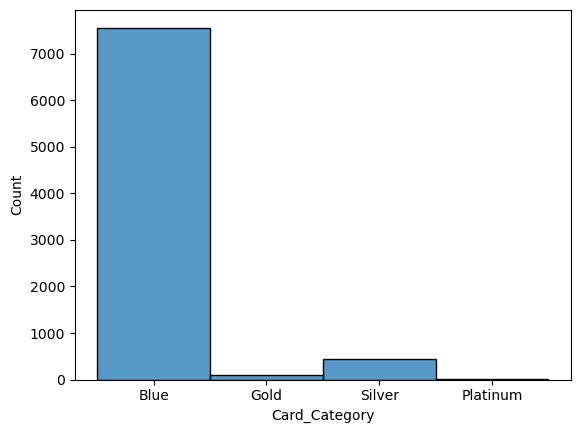

In [93]:
sns.histplot(data=bank_df , x='Card_Category')
plt.show()

Seems that most of the users who were/are subscribed to the bank were/are blue card holders, with a low income of less than 40k, somewhat distributed between married and single, mostly high school or college educated, and somewhat even distribution between male and female, with females slightly leading.

### 2.5.3 Numeric Features

#### 2.5.3.1 Numeric data summary

Performing a sanity check on numerical features along with the ydata profile report. 

In [79]:
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
train_idx,8101.0,4.050000e+03,2.338702e+03,0.0,2.025000e+03,4.050000e+03,6.075000e+03,8.100000e+03
CLIENTNUM,8101.0,7.391329e+08,3.691912e+07,708082083.0,7.130534e+08,7.178860e+08,7.728464e+08,8.283431e+08
Customer_Age,8101.0,4.630638e+01,8.022527e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.000000e+01
Dependent_count,8101.0,2.334773e+00,1.289564e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,8101.0,3.592359e+01,8.024359e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,8101.0,3.813233e+00,1.551838e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,8101.0,2.346871e+00,1.014177e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,8101.0,2.450315e+00,1.100687e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,8101.0,8.636548e+03,9.086420e+03,1438.3,2.555000e+03,4.549000e+03,1.112800e+04,3.451600e+04
Total_Revolving_Bal,8101.0,1.160383e+03,8.155043e+02,0.0,3.260000e+02,1.273000e+03,1.782000e+03,2.517000e+03


#### 2.5.3.2 Distributions Of Numeric Feature Values

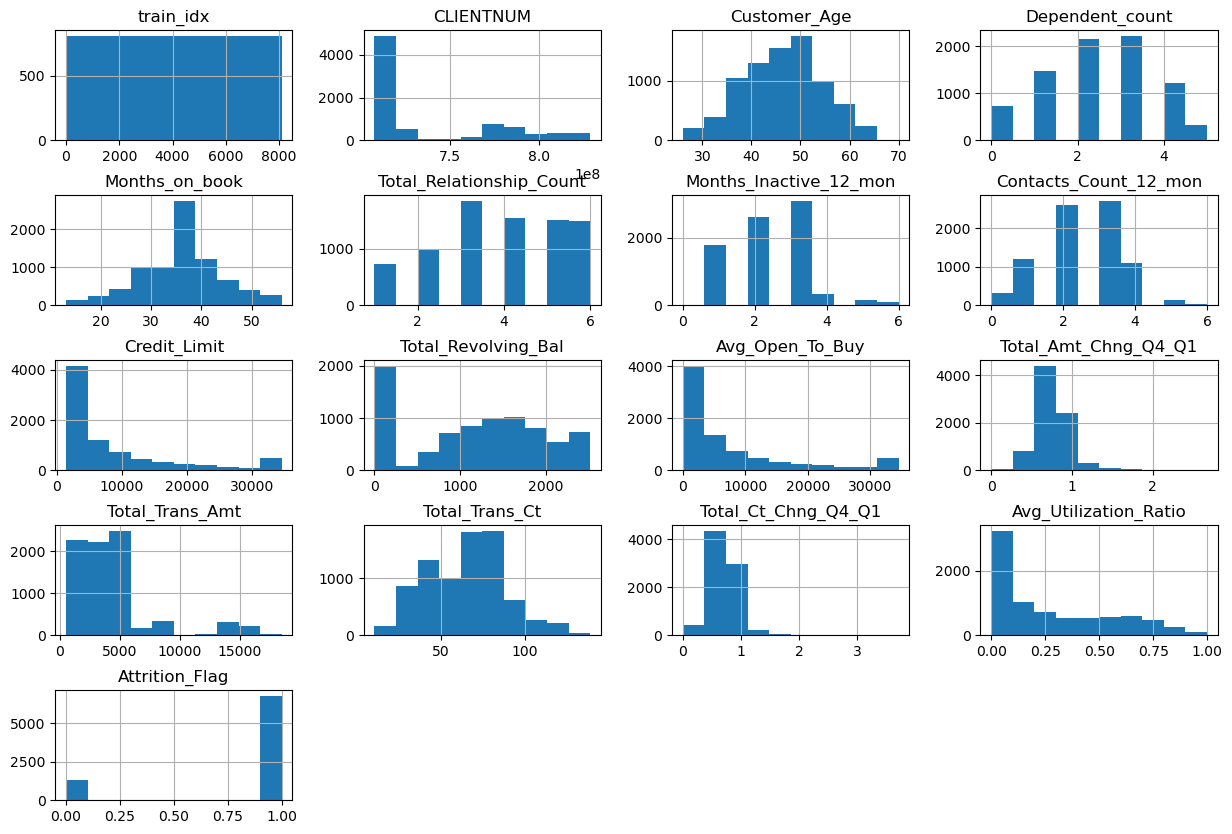

In [80]:
#Code statement below comes from ski_data project but used here to determine distribution of features as well.

bank_df.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);

Based on this analysis, there seems to be left skews for Credit_Limit, Avg_Open_to_Buy, Total_Trans_Amt, and Avg_Utilization_Ratio columns. 

## 2.6 Target Feature (Attrition Flag)

Attrition Flag column will be used as the target feature as this provides whether or not currently the customer has attrited from the bank and therefore what facotrs seem to be likely correlated with the column. 

In [43]:
#Created a correlation dataframe object for sanity check on ydata profile and easier manipulation of data.
bank_df.corr()

C:\Users\tpooz\AppData\Local\Temp\ipykernel_22396\2453432335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_df.corr()


,train_idx,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,1.000000,0.003892,-0.001941,-0.003070,0.010441,-0.007855,0.002101,0.001954,-0.009055,-0.003896,-0.008711,0.003627,0.019622,0.019790,0.000206,-0.000519,0.000638
CLIENTNUM,0.003892,1.000000,0.007326,-0.007080,0.134635,0.009358,0.006672,0.005028,0.008543,-0.001445,0.008679,0.021020,-0.021440,-0.003796,0.002594,-0.004018,0.047136
Customer_Age,-0.001941,0.007326,1.000000,-0.115442,0.792430,-0.008057,0.050469,-0.000541,0.001502,0.010867,0.000527,-0.068084,-0.047228,-0.070586,-0.004960,0.006002,-0.035203
Dependent_count,-0.003070,-0.007080,-0.115442,1.000000,-0.101181,-0.033282,0.000310,-0.045685,0.070340,0.002747,0.070141,-0.036242,0.017063,0.040036,0.005435,-0.035069,-0.020550
Months_on_book,0.010441,0.134635,0.792430,-0.101181,1.000000,-0.005419,0.077788,0.000933,0.006899,0.010743,0.005939,-0.058055,-0.040674,-0.053967,-0.009988,-0.004777,-0.022270
Total_Relationship_Count,-0.007855,0.009358,-0.008057,-0.033282,-0.005419,1.000000,-0.011546,0.053871,-0.072460,0.012873,-0.073665,0.049851,-0.345336,-0.235047,0.034198,0.068130,0.150889
Months_Inactive_12_mon,0.002101,0.006672,0.050469,0.000310,0.077788,-0.011546,1.000000,0.030814,-0.022438,-0.040999,-0.018771,-0.045081,-0.036037,-0.038684,-0.048167,-0.003389,-0.156552
Contacts_Count_12_mon,0.001954,0.005028,-0.000541,-0.045685,0.000933,0.053871,0.030814,1.000000,0.028083,-0.060309,0.033518,-0.018638,-0.118393,-0.161603,-0.092385,-0.063219,-0.211327
Credit_Limit,-0.009055,0.008543,0.001502,0.070340,0.006899,-0.072460,-0.022438,0.028083,1.000000,0.052401,0.995970,0.009813,0.170462,0.075919,-0.007696,-0.480605,0.024437
Total_Revolving_Bal,-0.003896,-0.001445,0.010867,0.002747,0.010743,0.012873,-0.040999,-0.060309,0.052401,1.000000,-0.037374,0.053703,0.070523,0.065448,0.088805,0.619852,0.263335


In [82]:
#Retrieved just the Attrition_Flag column from the correlation dataframe created and sorted based on correlation values

corr_df = bank_df.corr()
corr_df['Attrition_Flag'].sort_values(ascending=False)

C:\Users\tpooz\AppData\Local\Temp\ipykernel_22396\1322436958.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = bank_df.corr()


Attrition_Flag              1.000000
Total_Trans_Ct              0.380618
Total_Ct_Chng_Q4_Q1         0.288937
Total_Revolving_Bal         0.263335
Avg_Utilization_Ratio       0.179838
Total_Trans_Amt             0.178078
Total_Relationship_Count    0.150889
Total_Amt_Chng_Q4_Q1        0.128559
CLIENTNUM                   0.047136
Credit_Limit                0.024437
Avg_Open_To_Buy             0.000803
train_idx                   0.000638
Dependent_count            -0.020550
Months_on_book             -0.022270
Customer_Age               -0.035203
Months_Inactive_12_mon     -0.156552
Contacts_Count_12_mon      -0.211327
Name: Attrition_Flag, dtype: float64

From the correlation values listed above, it seems that customer attrition (attrition flag column) has some level of positive correlation with Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1, Credit_Limit. There is some negative correlation with Attrition_Flag as well namely Contacts_Count_12_mon, Months_Inactive_12_mon, Customer_Age, Months_on_book, and Dependent_count to be further explored as well.    

## 2.7 Save data

In [83]:
bank_df.shape

(8101, 22)

In [77]:
# save the data to a new csv file
datapath = 'C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets'
bank_df.to_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/bank_data_train_clean.csv')  

## 2.8 Summary

After an intial analysis and "cleaning" of the dataset, columns labeled as 'Unknown' were replaced with np.nan in order to provide proper values to assess missing data. From the columns after imputing np.nan, Education_Level,
Income_Category, and Marital_Status seem to be missing values in the dataset. In the categorical data analysis, seems that all data have appropriate unique values. The bank customer user base of those who were/are subscribed to the bank were/are  blue card holders, with a low income of less than 40k, somewhat distributed between married and single, mostly high school or college educated, and somewhat even distribution between male and female, with females slightly leading. In the numeric feature analysis, seems that Credit_Limit, Avg_Open_to_Buy, Total_Trans_Amt, and Avg_Utilization_Ratio columns have left skews. Looking at the target feature, Attrition_Flag column that details whether or not a customer has attrited within the dataset provided, few correlations were seen namely Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1, Credit_Limit all having positive correlations with Total_Trans_Ct as highest positive and Contacts_Count_12_mon, Months_Inactive_12_mon, Customer_Age, Months_on_book, and Dependent_count having negative correlations with Contacts_Count_12_mon as most negative. No columns were dropped in order to preserve information however would be wary for left skew columns and columns with NaN values namely Education_Level, Income_Category, and Marital_Status when subsequent steps of model development. Final shape of the dataset is as it began (8101, 22). A ydata profile report is also saved in the data wrangling file folder as a reference.
Further EDA will be conducted in order to also assess user base of customers currently subscribed to the bank and customers who have attritted.